### Pandas.pivot( ) and Pandas.Pivot_table( )

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X,y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y

In [2]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index='num-of-doors', 
                                columns='fuel-type', 
                                aggfunc=np.mean),2)
pivot

fuel-type,diesel,gas
num-of-doors,,
four,16432.38,13092.81
two,14350.00,12762.76


In [3]:
pivot = np.round(pd.pivot_table(data, values='price', 
                                index=['num-of-doors', 'body-style'], 
                                columns=['fuel-type', 'fuel-system'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
pivot

fuel-type                   diesel      gas                                   \
fuel-system                    idi     1bbl     2bbl   4bbl    mfi      mpfi   
num-of-doors body-style                                                        
four         wagon        19727.67  7295.00  8028.89      0      0  14213.42   
             sedan        16328.92  8811.67  7711.19      0      0  18425.68   
             hatchback     7788.00     0.00  7813.71      0      0  10618.00   
two          hardtop      28176.00     0.00  8249.00      0      0  23540.50   
             sedan         7437.00     0.00  7570.00      0      0  21034.00   
             hatchback        0.00  7054.43  6701.67  12145  12964  14581.50   
             convertible      0.00     0.00     0.00      0      0  21890.50   

fuel-type                                  
fuel-system                   spdi   spfi  
num-of-doors body-style                    
four         wagon            0.00      0  
             sedan         9279.00      0  
             hatchback        0.00      0  
two          hardtop          0.00      0  
             sedan            0.00      0  
             hatchback    11479.43  11048  
             convertible      0.00      0

<AxesSubplot:title={'center':'Mean car price by make and number of doors'}, ylabel='make'>

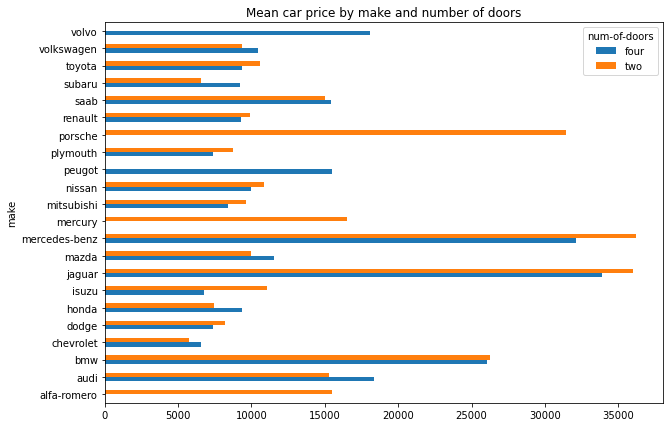

In [4]:
np.round(pd.pivot_table(data, values='price', 
                                index=['make'], 
                                columns=['num-of-doors'], 
                                aggfunc=np.mean,
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean car price by make and number of doors')

In [5]:
np.round(pd.pivot_table(data, values='price', 
                                index=['body-style'], 
                                columns=['num-of-doors'], 
                                aggfunc=[np.mean, np.median],
                                fill_value=0),2)

mean           median         
num-of-doors      four       two   four      two
body-style                                      
hardtop           0.00  22208.50      0  19687.5
wagon         12371.96      0.00  11694      0.0
sedan         14614.13  14283.00  12555   8678.0
hatchback      8372.00  10230.79   8073   8970.0
convertible       0.00  21890.50      0  17084.5

In [6]:
np.round(pd.pivot_table(data, values='price', 
                                index=['body-style'], 
                                columns=['num-of-doors'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, margins_name='Total'),2)

sum                    
num-of-doors     four      two      Total
body-style                               
hardtop             0   177668   177668.0
wagon          309299        0   309299.0
sedan         1139902   199962  1339864.0
hatchback       83720   593386   677106.0
convertible         0   131343   131343.0
Total         1532921  1102359  2635280.0

In [7]:
pivot = np.round(pd.pivot_table(data, values=['price', 'horsepower'], 
                                index=['make'], 
                                aggfunc=np.mean,
                                fill_value=0),2)

pivot.style.format({'price':'${0:,.0f}',
                   'horsepower':'{0:,.0f}hp'})

,horsepower,price
make,,
alfa-romero,125hp,"$15,498"
audi,121hp,"$17,859"
bmw,139hp,"$26,119"
chevrolet,63hp,"$6,007"
dodge,86hp,"$7,875"
honda,80hp,"$8,185"
isuzu,77hp,"$8,916"
jaguar,205hp,"$34,600"
mazda,86hp,"$10,653"


In [8]:
pivot = np.round(pd.pivot_table(data, values=['price', 'horsepower'], 
                                index=['make'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
                                
pivot = pivot.reindex(pivot['price'].sort_values(ascending=False).index).nlargest(10, 'price')

pivot.style.format({'price':'${0:,.0f}',
                   'horsepower':'{0:,.0f}hp'}).bar(color='#d65f5f')

,horsepower,price
make,,
jaguar,205hp,"$34,600"
mercedes-benz,146hp,"$33,647"
porsche,210hp,"$31,400"
bmw,139hp,"$26,119"
volvo,128hp,"$18,063"
audi,121hp,"$17,859"
mercury,175hp,"$16,503"
alfa-romero,125hp,"$15,498"
peugot,100hp,"$15,489"
